**Срезы данных и поиск авиабилетов**

In [1]:
import pandas as pd
df = pd.DataFrame(
    {
        'From': [
            'Moscow',
            'Moscow',
            'St. Petersburg',
            'St. Petersburg',
            'St. Petersburg',
        ],
        'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
        'Is_Direct': [False, True, False, False, True],
        'Has_luggage': [True, False, False, True, False],
        'Price': [21032, 19250, 19301, 20168, 31425],
        'Date_From': [
            '01.07.19',
            '01.07.19',
            '04.07.19',
            '03.07.19',
            '05.07.19',
        ],
        'Date_To': [
            '07.07.19',
            '07.07.19',
            '10.07.19',
            '09.07.19',
            '11.07.19',
        ],
        'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
        'Travel_time_from': [995, 230, 605, 365, 255],
        'Travel_time_to': [350, 225, 720, 355, 250],
    }
)

In [2]:
df.head()

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.19,10.07.19,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.19,09.07.19,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.19,11.07.19,Rossiya,255,250


1.Выберите строки с выгодной ценой за авиабилет. Выгодными считаются те билеты, которые дешевле самого дорогого билета более чем в 1,5 раза.
Выведите на экран полученную выборку.

In [3]:
price_max=((df['Price']).max())/1.5
print(price_max)

20950.0


In [4]:
df_lower_max_price=df.query("Price < @price_max")
df_lower_max_price.head()

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.19,10.07.19,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.19,09.07.19,Swiss,365,355


In [5]:
print(f'Найдено выгодных билетов: {len(df_lower_max_price)}')

Найдено выгодных билетов: 3



Выберите строки, где значения столбца Travel_time_from больше или равны 365 или значения Travel_time_to меньше 250. Результат выведите на экран.

In [6]:
print(df.query("Travel_time_from >= 365 | Travel_time_to < 250"))

             From         To  Is_Direct  Has_luggage  Price Date_From  \
0          Moscow       Rome      False         True  21032  01.07.19   
1          Moscow       Rome       True        False  19250  01.07.19   
2  St. Petersburg       Rome      False        False  19301  04.07.19   
3  St. Petersburg  Barcelona      False         True  20168  03.07.19   

    Date_To  Airline  Travel_time_from  Travel_time_to  
0  07.07.19  Belavia               995             350  
1  07.07.19       S7               230             225  
2  10.07.19  Finnair               605             720  
3  09.07.19    Swiss               365             355  



Выберите строки, где:
полёт с пересадкой;
прилёт до 8 июля (ни 9, ни 10, ни 11 июля).
Результат выведите на экран.

In [7]:
print((df['Date_To']).unique())

['07.07.19' '10.07.19' '09.07.19' '11.07.19']


In [8]:
condition_1=~df['Is_Direct']
condition_2=~df['Date_To'].isin(['10.07.19', '09.07.19', '11.07.19'])

In [9]:
result=df[condition_1 & condition_2]

In [10]:
result.head()

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350


**Срезы в действии**

In [11]:
data = pd.read_csv('visits.csv', sep='\t')

In [12]:
data.head()

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк


Итак, нужно разобраться с аномалиями в выборке. Для начала найдите АЗС с самыми большими значениями в столбце time_spent.
Одной строкой кода отсортируйте таблицу по убыванию значений в столбце time_spent и выведите на экран первые 10 строк всей таблицы.

In [13]:
print((data.sort_values('time_spent', ascending=False)).head(10))

              date_time        id  time_spent      name
114797  20180402T055708  3c1e4c52     28925.0   Василёк
27147   20180406T080254  4b5f2af5     28519.0   Немезия
60547   20180408T000002  cf1ba8a5     28292.0   Василёк
19042   20180408T204208  5410e876     23696.0   Василёк
118597  20180408T165020  3c1e4c52     21184.0   Василёк
118058  20180402T111333  3c1e4c52     20359.0   Василёк
114406  20180408T083722  3c1e4c52     19886.0   Василёк
132164  20180405T160745  627ea5e3     19445.0    Левкой
281360  20180406T180459  d0c0928d     18614.0      Пион
165326  20180402T230204  3af3bb71     18569.0  Агератум


Четыре из десяти самых долгих заездов произошли на станции под номером 3c1e4c52. 
Аналитик данных непременно спросит: «А как распределение времени, проведённого на этой АЗС, соотносится с распределением времени заездов в целом?» 
Нужно проверить. Для этого сделайте срез данных и извлеките всю информацию о станции 3c1e4c52.
Сделайте срез data по АЗС с id == "3c1e4c52" и сохраните результат в переменную sample.
Выведите на экран число заездов на эту АЗС.

In [14]:
sample=data.query("id == '3c1e4c52'")
print(len(sample))

5814


.
Нужно сравнить распределение времени пребывания на станции 3c1e4c52 с распределением времени пребывания на всех АЗС. Если они сильно различаются, возможно, станция 3c1e4c52 представляет собой статистический выброс.
Методом hist() постройте две гистограммы распределения значений в столбце time_spent: одну для объекта data, вторую — для sample. Не забудьте использовать plt.show() после каждого вызова hist().
Для обеих гистограмм задайте одинаковые аргументы: range — от 0 до 1500, bins — 100

In [15]:
import matplotlib.pyplot as plt

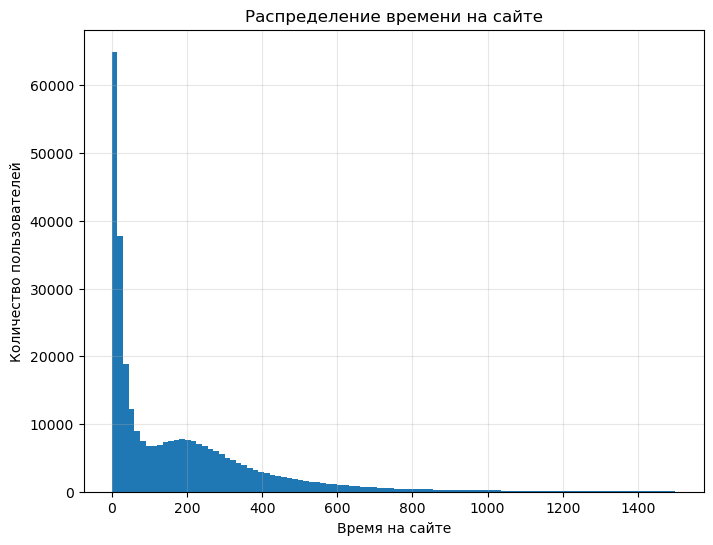

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(data['time_spent'], bins=100, range=(0, 1500))
plt.xlabel('Время на сайте')
plt.ylabel('Количество пользователей')
plt.title('Распределение времени на сайте')
plt.grid(True, alpha=0.3)
plt.show()  

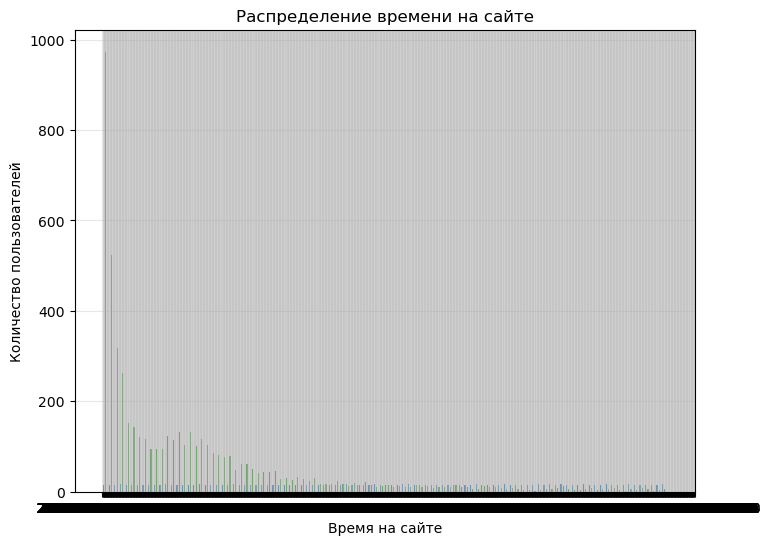

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(sample, bins=100, range=(0, 1500))
plt.xlabel('Время на сайте')
plt.ylabel('Количество пользователей')
plt.title('Распределение времени на сайте')
plt.grid(True, alpha=0.3)
plt.show()  

**Работа с датой и временем**

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317104 entries, 0 to 317103
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date_time   317104 non-null  object 
 1   id          317104 non-null  object 
 2   time_spent  317104 non-null  float64
 3   name        317104 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.0+ MB


In [19]:
data.head()

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк


In [20]:
data['date_time']=pd.to_datetime(data['date_time'])

In [21]:
data.head()

,date_time,id,time_spent,name
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк


In [22]:
data['local_time']=data['date_time']+pd.Timedelta(hours=3)

In [23]:
data.head()

,date_time,id,time_spent,name,local_time
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49


К данным столбца local_time примените метод dt.round(). Передайте методу строку 1H. Присвойте результат столбцу date_hour.

In [24]:
data['date_hour']=data['local_time'].dt.round('1H')


<ipython-input-24-700399b37f4c>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['date_hour']=data['local_time'].dt.round('1H')


In [25]:
data.head()

,date_time,id,time_spent,name,local_time,date_hour
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00


Снова создайте переменную sample, записав в неё срез из данных по АЗС с id == '3c1e4c52'. Обратите внимание, что на этот раз в sample войдут все форматы времени.
Пользуясь данными sample, постройте график зависимости продолжительности заправки от времени заезда. За основу возьмите соответствующие столбцы time_spent и local_time. Оси X присвойте значения столбца local_time, а оси Y — значения столбца time_spent.
Проверьте, всё ли верно отображено на графике:
Каждый элемент обозначен точкой.
Диапазон оси Y указан от 0 до 1000.
Добавлены сетки.
Размер графика 12х6 дюймов.
Подсказка
Методом query() получите нужный срез. Сохраните результат в sample. Методу plot() задайте параметры: x, y, ylim, style, grid, figsize.

In [26]:
sample_=data.query("id == '3c1e4c52'")

<Axes: xlabel='local_time'>

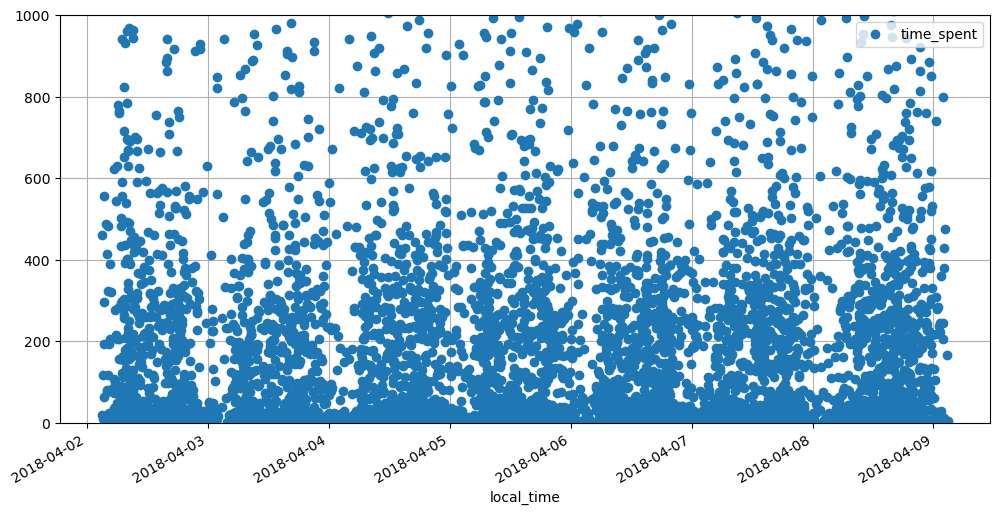

In [27]:
sample_.plot(x='local_time', y='time_spent', style='o', ylim=(0, 1000), figsize=(12, 6), grid=True)

**Группировка с pivot_table()**

<Axes: xlabel='date_hour'>

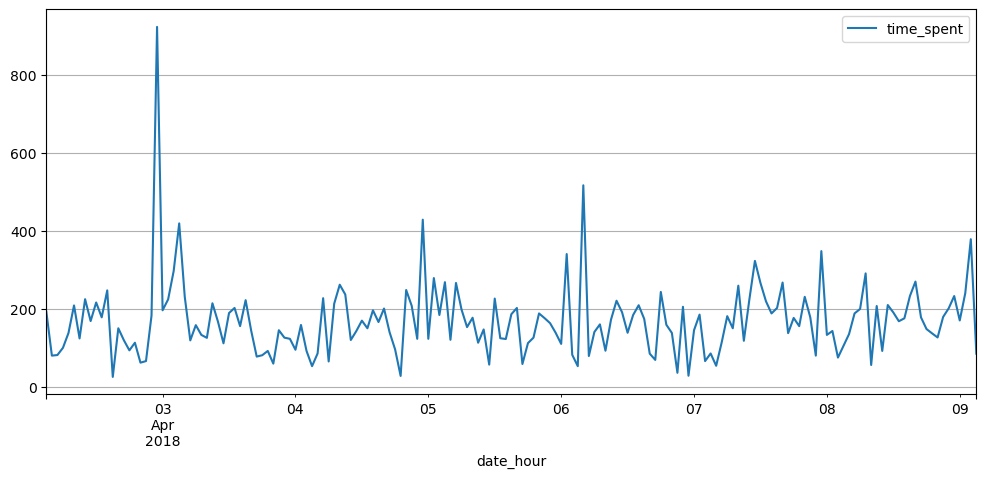

In [28]:
(
    data.query('id == "3c1e4c52"')
    .pivot_table(index='date_hour', values='time_spent', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) 

In [29]:
data.head()

,date_time,id,time_spent,name,local_time,date_hour
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00


<Axes: xlabel='date_hour'>

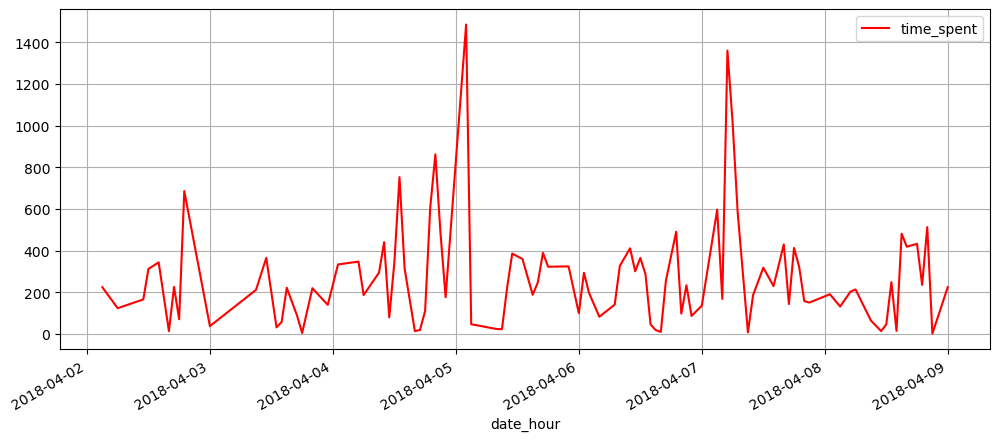

In [30]:
(
  data.query('id=="76144fb2"')
    .pivot_table(index='date_hour', values='time_spent', aggfunc='median')
    .plot(grid=True, color='red', figsize=(12, 5))
) 

**Помечаем срез данных**

In [31]:
data['too_fast']=data['time_spent']<60

In [32]:
data.head()

,date_time,id,time_spent,name,local_time,date_hour,too_fast
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00,True
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00,True
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00,True


In [33]:
print(f'Процент всех заездов короче 60 секунд равен:  {(data['too_fast'].mean()*100).round()}')

Процент всех заездов короче 60 секунд равен:  42.0


In [34]:
too_fast_stat=data.pivot_table(index='id', values='too_fast')

In [35]:
too_fast_stat.head()

,too_fast
id,
00ca1b70,0.250000
011f7462,0.637489
015eaddd,0.726190
0178ce70,0.211538
018a83ef,0.510269


array([[<Axes: title={'center': 'too_fast'}>]], dtype=object)

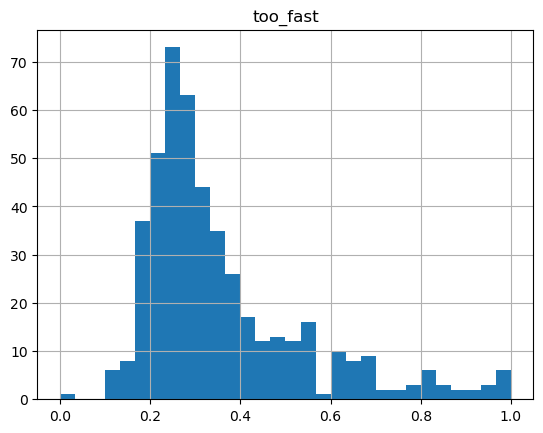

In [36]:
too_fast_stat.hist(bins=30)

In [37]:
data['too_slow']=data['time_spent']>1000

In [38]:
data.head()

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00,True,False
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00,True,False
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00,True,False


In [39]:
too_slow_stat=data.pivot_table(index='id', values='too_slow')

In [40]:
too_slow_stat.head()

,too_slow
id,
00ca1b70,0.005682
011f7462,0.006416
015eaddd,0.011905
0178ce70,0.000000
018a83ef,0.023697


array([[<Axes: title={'center': 'too_slow'}>]], dtype=object)

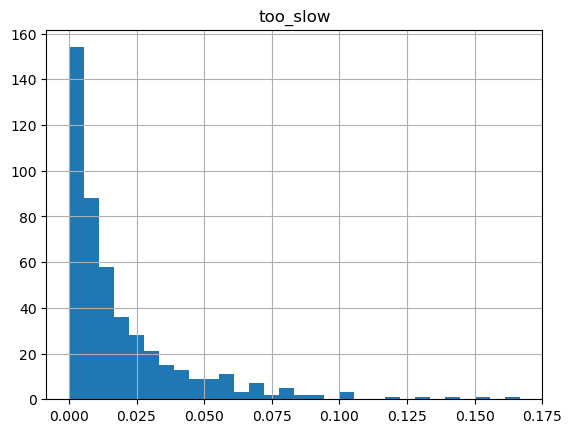

In [41]:
too_slow_stat.hist(bins=30)

**Работа с несколькими источниками данных**


**Срез по данным из внешнего словаря (продолжение)**

.
Проблема: в выборке есть АЗС, на которых длительность большинства заездов короче 60 секунд.
Что нужно сделать: исключить эти АЗС из анализа. Так будет меньше шансов получить необъективные результаты, поскольку коротких заездов в целом больше всего.
Правило: исключаются из анализа те АЗС, на которых длительность половины или более заездов короче 60 секунд. Если бы вы писали отчёт, это предложение непременно вошло бы в него.
Примените правило на практике. Сначала из таблицы too_fast_stat получите id станций, которые не нарушают правило. Затем используйте эти id, чтобы отфильтровать таблицу data.
Выполните следующие шаги:
Создайте переменную good_ids и поместите в неё те строки из too_fast_stat, где too_fast меньше 50%. Не забывайте, что в таблице data too_fast является булевым значением и атрибутом заезда, но в таблице too_fast_stat too_fast — это процент заездов, длительность которых короче 60 секунд, и атрибут заправочной станции.
Создайте переменную good_data и поместите в неё те строки из data, где в good_ids.index находится id. Другими словами, соберите все заезды, не нарушающие правило.
Распечатайте число строк в data, а затем и число строк в good_data.

In [42]:
good_ids=too_fast_stat.query('too_fast<0.5')

In [43]:
print(good_ids)

          too_fast
id                
00ca1b70  0.250000
0178ce70  0.211538
01abf4e9  0.268293
030a9067  0.330435
03740f2d  0.261261
...            ...
fb6610be  0.265651
fbbd8cc2  0.239669
fc4b1b72  0.191136
fea1d1b8  0.326087
ff0f01d2  0.244094

[386 rows x 1 columns]


In [44]:
 good_data=data.query('id in @good_ids.index and 60<=time_spent <=1000' )

In [45]:
 good_data.head()

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False
6,2018-04-02 08:23:21,76144fb2,555.0,Василёк,2018-04-02 11:23:21,2018-04-02 11:00:00,False,False
7,2018-04-07 00:34:08,76144fb2,286.0,Василёк,2018-04-07 03:34:08,2018-04-07 04:00:00,False,False
9,2018-04-05 13:19:39,76144fb2,248.0,Василёк,2018-04-05 16:19:39,2018-04-05 16:00:00,False,False


In [46]:
data.shape

(317104, 8)

In [47]:
good_data.shape

(154601, 8)

In [48]:
stations_stat=data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat=good_data.pivot_table(index='id', values='time_spent', aggfunc='median')

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

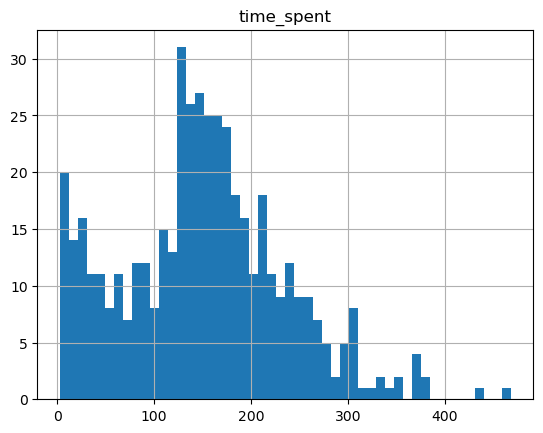

In [49]:
stations_stat.hist(bins=50)

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

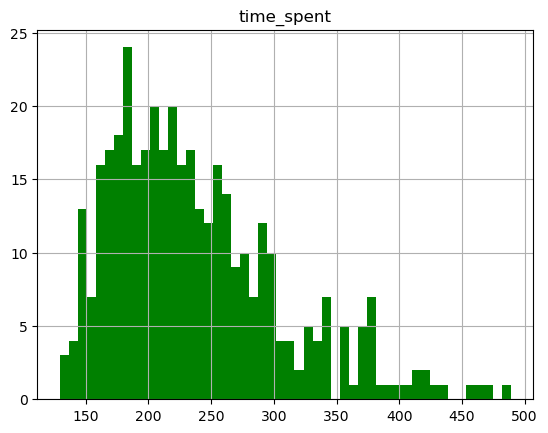

In [50]:
good_stations_stat.hist(bins=50, color='green')

In [51]:
stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

In [52]:
stat.head()

,time_spent,good_time_spent
name,,
Агератум,337.802721,309.0
Амарант,132.760012,187.5
Аммобиум,256.708042,180.5
Арктотис,73.879984,185.0
Астильба,376.143149,423.0


In [53]:
id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']

In [54]:
id_name.head()

,name,count
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157


**Объединение столбцов методами merge() и join()**

In [55]:
station_stat_full=id_name.join(good_stations_stat )

In [56]:
station_stat_full.head()

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0


Используя данные из station_stat_full, постройте гистограмму числа заездов на 30 корзин.

array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'time_spent'}>]], dtype=object)

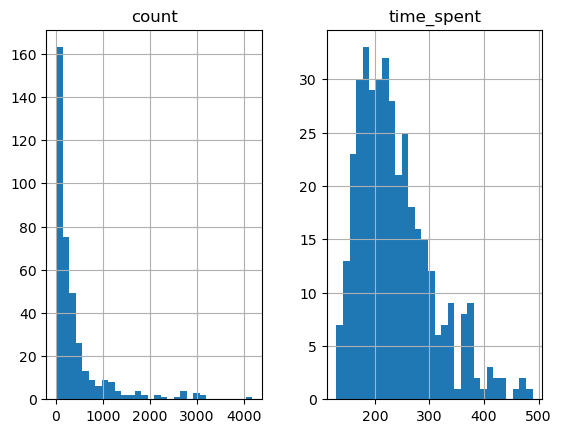

In [57]:
 station_stat_full.hist(bins=30)

Постройте вторую гистограмму по тем же данным, но теперь задайте диапазон от 0 до 300 заездов.

array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'time_spent'}>]], dtype=object)

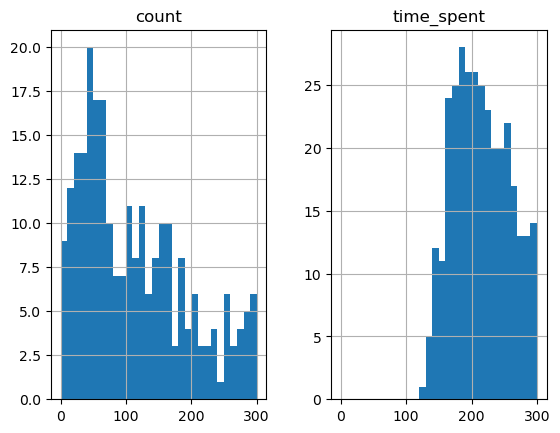

In [58]:
 station_stat_full.hist(bins=30, range=(0, 300))

In [63]:
station_stat_full.head()

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0


In [64]:
good_stat2=(station_stat_full
           .query('count>30')
           .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count']))

In [65]:
good_stat2.head()

,median,count
,time_spent,time_spent
name,,
Агератум,308.50,3
Амарант,169.00,5
Аммобиум,178.75,4
Арктотис,190.50,3
Астильба,435.50,4


In [66]:
good_stat2.columns=['median_time', 'station']

In [67]:
good_stat2.head()

,median_time,station
name,,
Агератум,308.50,3
Амарант,169.00,5
Аммобиум,178.75,4
Арктотис,190.50,3
Астильба,435.50,4


In [68]:
stat.head()

,time_spent,good_time_spent
name,,
Агератум,337.802721,309.0
Амарант,132.760012,187.5
Аммобиум,256.708042,180.5
Арктотис,73.879984,185.0
Астильба,376.143149,423.0


In [69]:
final_stat=stat.join(good_stat2)

In [71]:
final_stat.head()

,time_spent,good_time_spent,median_time,station
name,,,,
Агератум,337.802721,309.0,308.50,3.0
Амарант,132.760012,187.5,169.00,5.0
Аммобиум,256.708042,180.5,178.75,4.0
Арктотис,73.879984,185.0,190.50,3.0
Астильба,376.143149,423.0,435.50,4.0


**Диаграмма рассеяния**

In [72]:
station_stat_full.head()

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0


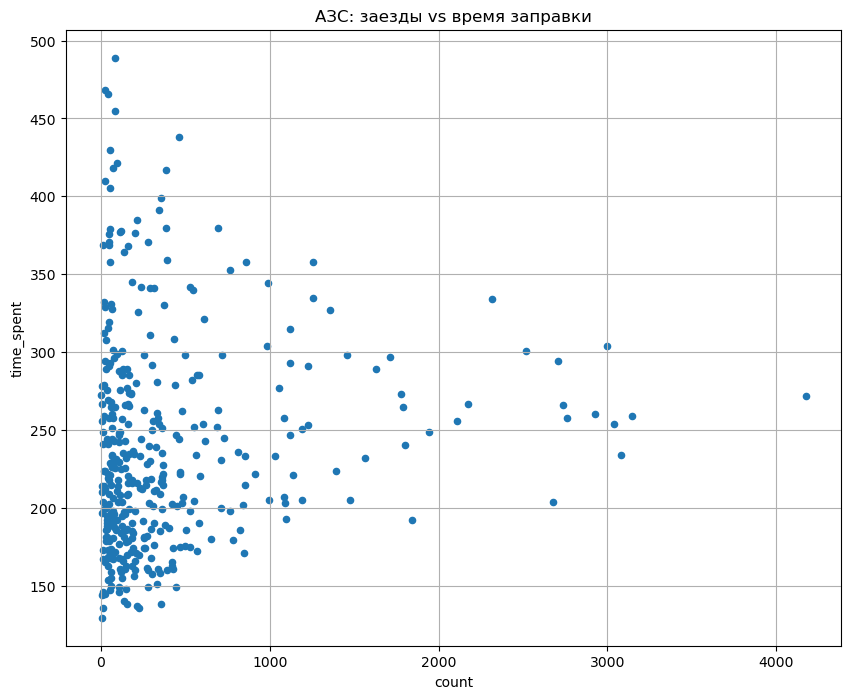

In [82]:
station_stat_full.plot(kind='scatter', figsize=(10, 8), x='count', y='time_spent', grid=True, title='АЗС: заезды vs время заправки')
plt.xlabel('count')
plt.ylabel('time_spent')
plt.show()

**Корреляция**

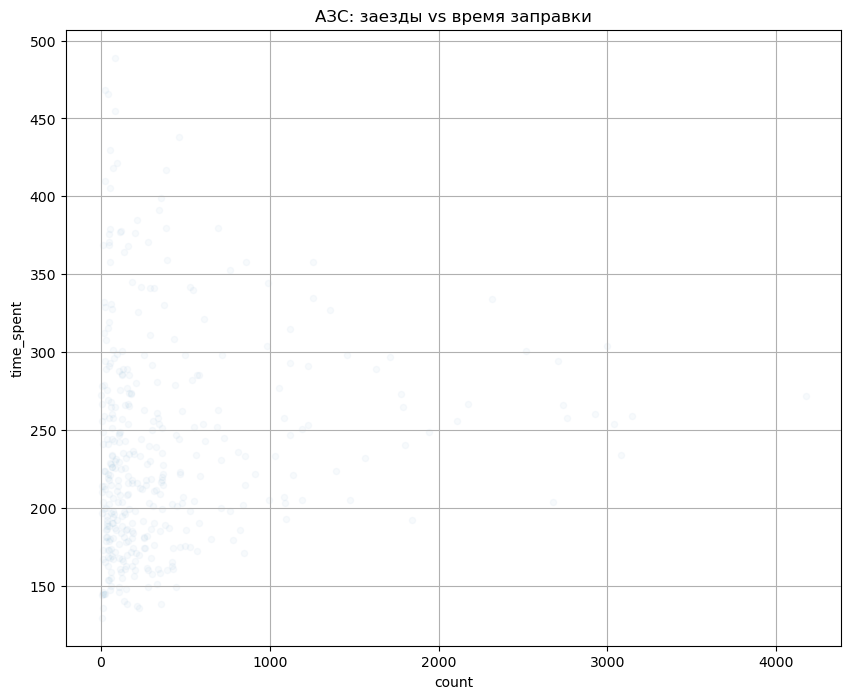

In [86]:
station_stat_full.plot(kind='scatter', figsize=(10, 8), alpha=0.03, x='count', y='time_spent', grid=True, title='АЗС: заезды vs время заправки')
plt.xlabel('count')
plt.ylabel('time_spent')
plt.show()

In [87]:
print(station_stat_full['count'].corr(station_stat_full['time_spent']))

0.12242632473597162


**Матрица диаграмм рассеяния-pd.plotting.scatter_matrix(df)**

In [102]:
station_stat_multi=data.pivot_table(index='name', values=['time_spent', 'too_fast', 'too_slow'], aggfunc='mean')

In [103]:
station_stat_multi.head()

,time_spent,too_fast,too_slow
name,,,
Агератум,337.802721,0.254422,0.040136
Амарант,132.760012,0.514437,0.009314
Аммобиум,256.708042,0.340909,0.055944
Арктотис,73.879984,0.685301,0.001564
Астильба,376.143149,0.249489,0.055215


In [104]:
print(station_stat_multi.corr())

            time_spent  too_fast  too_slow
time_spent    1.000000 -0.762380  0.829694
too_fast     -0.762380  1.000000 -0.423459
too_slow      0.829694 -0.423459  1.000000


array([[<Axes: xlabel='time_spent', ylabel='time_spent'>,
        <Axes: xlabel='too_fast', ylabel='time_spent'>,
        <Axes: xlabel='too_slow', ylabel='time_spent'>],
       [<Axes: xlabel='time_spent', ylabel='too_fast'>,
        <Axes: xlabel='too_fast', ylabel='too_fast'>,
        <Axes: xlabel='too_slow', ylabel='too_fast'>],
       [<Axes: xlabel='time_spent', ylabel='too_slow'>,
        <Axes: xlabel='too_fast', ylabel='too_slow'>,
        <Axes: xlabel='too_slow', ylabel='too_slow'>]], dtype=object)

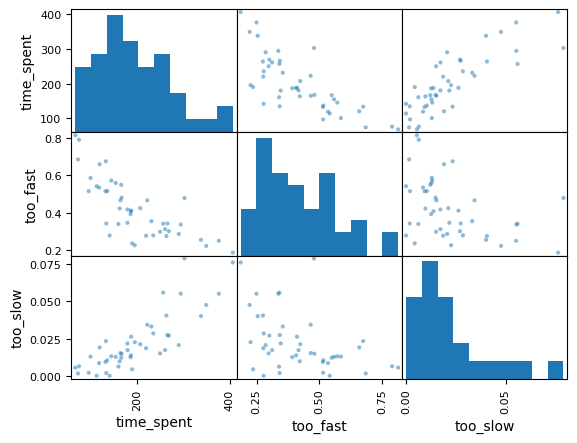

In [106]:
pd.plotting.scatter_matrix(station_stat_multi)

**Как выжать максимум из очевидности**

In [109]:
good_stations_stat.head()

,time_spent
id,
00ca1b70,166.0
0178ce70,234.5
01abf4e9,181.5
030a9067,135.5
03740f2d,289.0


In [112]:
station_stat_multi['good_time_spent']=good_stations_stat['time_spent'].mean()

In [113]:
station_stat_multi.head()

,time_spent,too_fast,too_slow,good_time_spent
name,,,,
Агератум,337.802721,0.254422,0.040136,237.734456
Амарант,132.760012,0.514437,0.009314,237.734456
Аммобиум,256.708042,0.340909,0.055944,237.734456
Арктотис,73.879984,0.685301,0.001564,237.734456
Астильба,376.143149,0.249489,0.055215,237.734456
